# mnist basic approach (softmax)

## imports

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
%matplotlib inline

## data

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [4]:
mnist.train.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [5]:
mnist.train.num_examples

55000

### visualizing the data

In [11]:
mnist.train.images[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [12]:
mnist.train.images[0].shape

(784,)

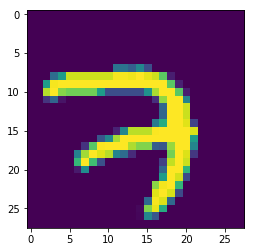

In [7]:
image0 = mnist.train.images[0].reshape(28, 28)
plt.imshow(image0)

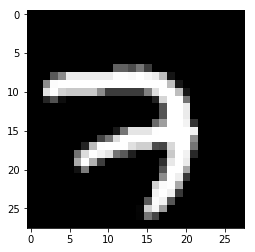

In [8]:
plt.imshow(image0, cmap="gist_gray")

## placeholders and variables

In [13]:
img_dim = mnist.train.images[0].shape[0]
img_dim

784

In [37]:
num_classes = len(np.unique(ar=mnist.test.labels, axis=0))
num_classes

10

In [14]:
#flattened arrays represent 28x28 images
x = tf.placeholder(tf.float32, shape=[None, img_dim])

In [24]:
w = tf.Variable(tf.zeros(shape=[img_dim, num_classes]))
b = tf.Variable(tf.zeros([num_classes]))

## graph

In [27]:
y_pred = tf.add(tf.matmul(x, w), b)

## loss

In [28]:
y_true = tf.placeholder(tf.float32, shape=[None, num_classes]) 
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(
        labels=y_true,
        logits=y_pred
    )
)

## optimizer


In [29]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(cross_entropy)

## session

In [31]:
epochs = 1000

In [40]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for step in range(epochs):
        #get batches
        batch_x, batch_y = mnist.train.next_batch(100)
        #run training
        sess.run(train, feed_dict={
            x: batch_x,
            y_true: batch_y
        })
        
    #evaluate
    correct_preds = tf.equal(tf.argmax(y_pred, axis=1), tf.argmax(y_true, 1))
    #accuracy
    acc = tf.reduce_mean(tf.cast(correct_preds, tf.float32))
    
    #output accuracy
    print(sess.run(acc, feed_dict={
        x: mnist.test.images,
        y_true: mnist.test.labels
    }))

0.9191
